In [1]:
import pandas as pd
import numpy 
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir('/home/adri/Projects/phd/bias_2')
import re

In [2]:
df = pd.read_csv('data/raw/alanin_scanning-cuantitative_values-emax_ec50.csv')

In [3]:
def is_ala(x):
    
    if type(x) is str:
    
        return bool(re.match('^.\d+$', x))
    else:
        return False
    

In [4]:
df = df[df.Mutant.apply(is_ala)]

In [5]:
df = df[['Position', '%wt expression', 'Emax_avg_corr_Gi2_HU210', 'Emax_avg_corr_bArr1_HU210']]

In [6]:
df.columns = ['mutant', 'expression', 'gi', 'barr1']

In [7]:
df = df.dropna()

In [8]:
path = 'data/processed/features_new.csv'
features = pd.read_csv(path, index_col=0)
simulated_mutants = features.mutant_id.unique()

/tmp/ipykernel_1837514/3690528942.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  features = pd.read_csv(path, index_col=0)


In [9]:
new_simulated_mutants = list(map(str, simulated_mutants))

In [10]:
old_simulated_mutants = list(map(str, [ 33,  47,  49,  52,  53,  76,  77,  91, 112, 119, 121, 152, 159,
       165, 178, 185, 203, 205, 217, 220, 251, 282, 291, 293, 297]))

In [11]:
new_mutants = set(new_simulated_mutants) - set(old_simulated_mutants)

In [12]:
df[df.mutant.astype(str).isin(new_mutants)]

,mutant,expression,gi,barr1
60,61,56.813413,1.462447,0.000000
114,109,71.507322,1.379291,0.000000
123,117,73.715844,1.046510,0.000000
133,125,73.109448,1.266463,0.000000
185,176,77.703703,1.274724,0.000000
208,199,72.137412,0.952902,0.000000
296,285,76.740448,1.042986,0.000000
303,292,78.872476,0.988430,0.000000
313,302,85.166760,1.304523,0.000000
324,313,103.116714,1.107911,0.718919


In [13]:
df['simulated'] = df.mutant.isin(new_simulated_mutants)
df['simulated'] = df.simulated.apply(lambda x: 'simulated' if x else 'not simulated')

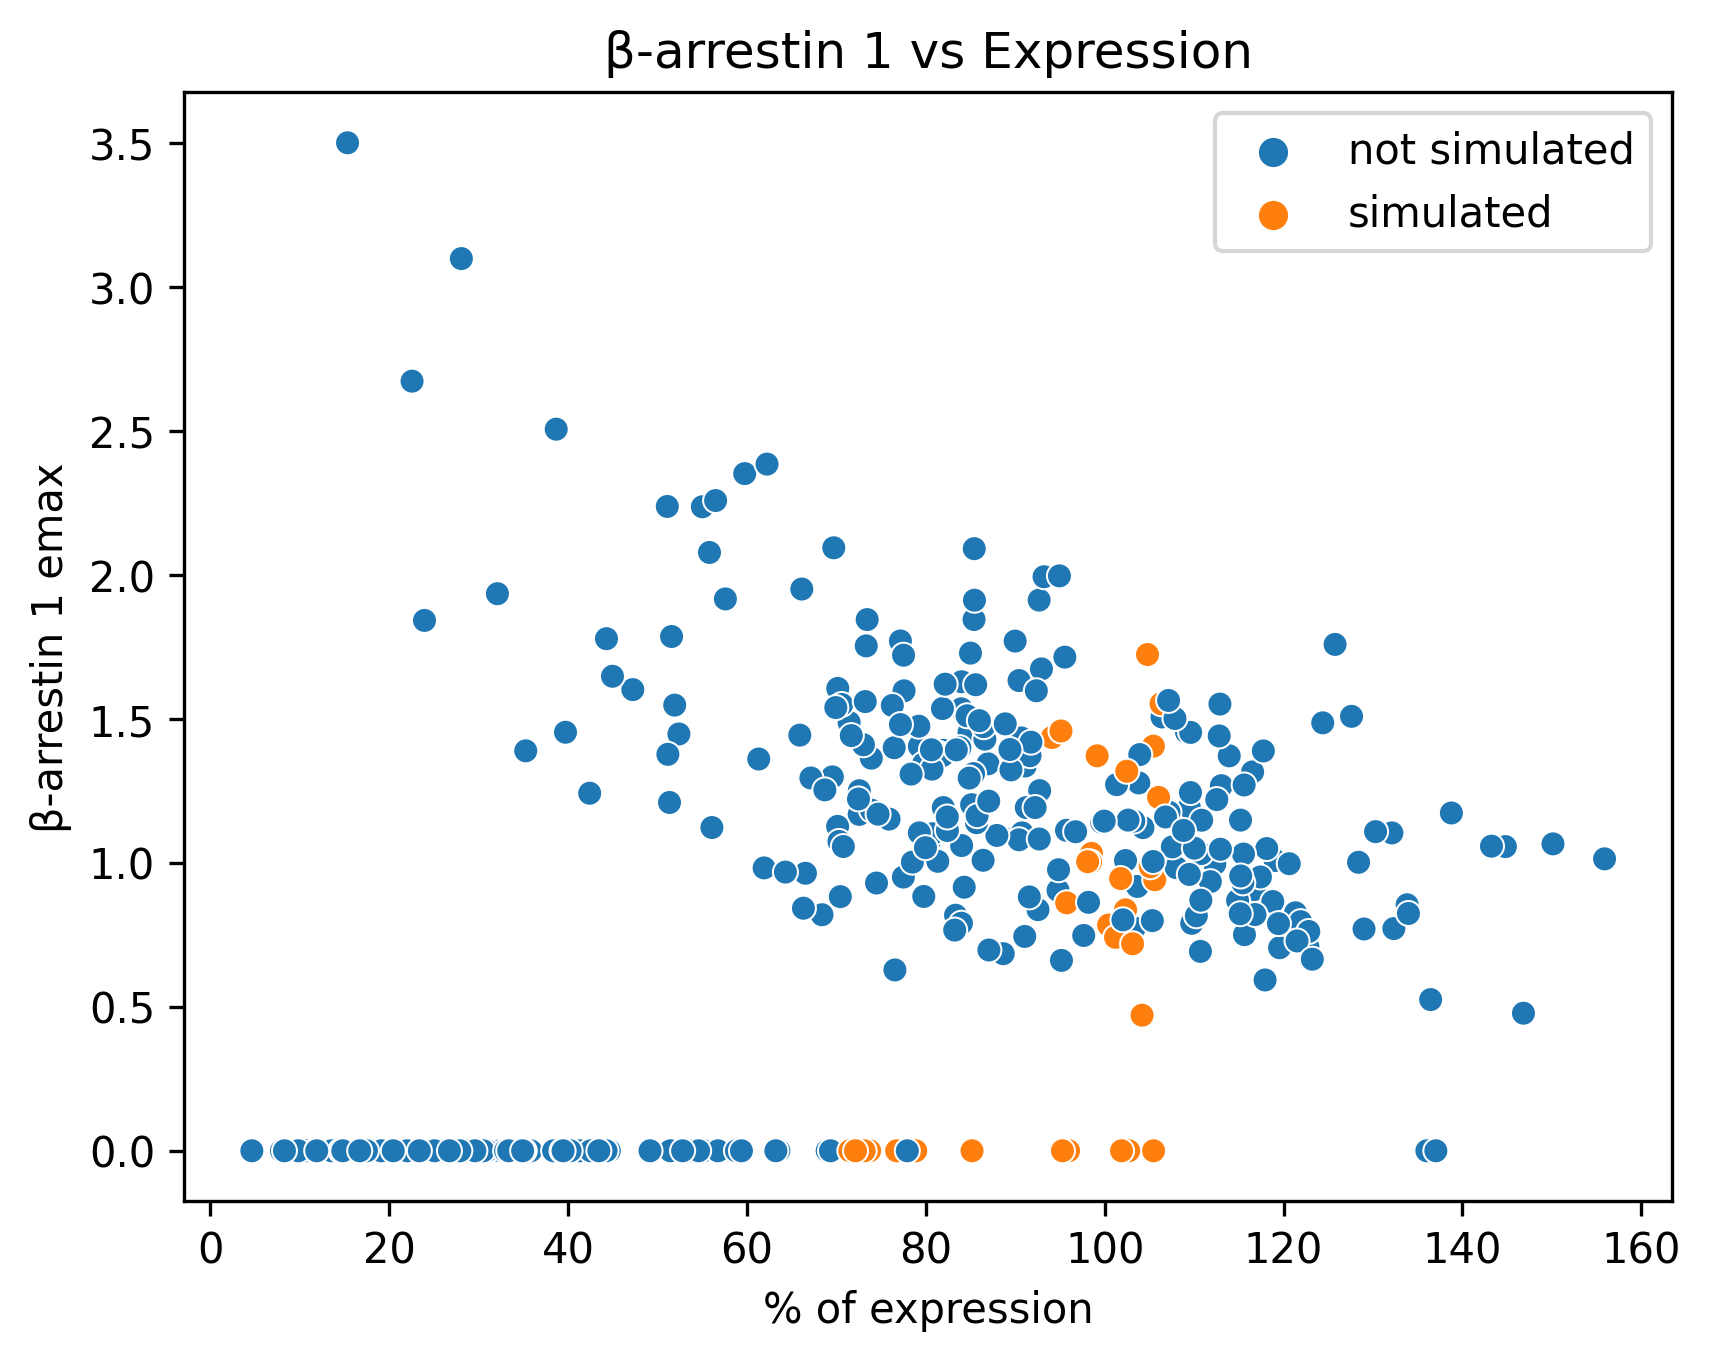

In [14]:
plt.figure(dpi=300)
g = sns.scatterplot(data=df, x='expression', y='barr1', hue='simulated')
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles, labels=labels)
plt.xlabel('% of expression')
plt.ylabel('β-arrestin 1 emax')
plt.title('β-arrestin 1 vs Expression')
plt.show()

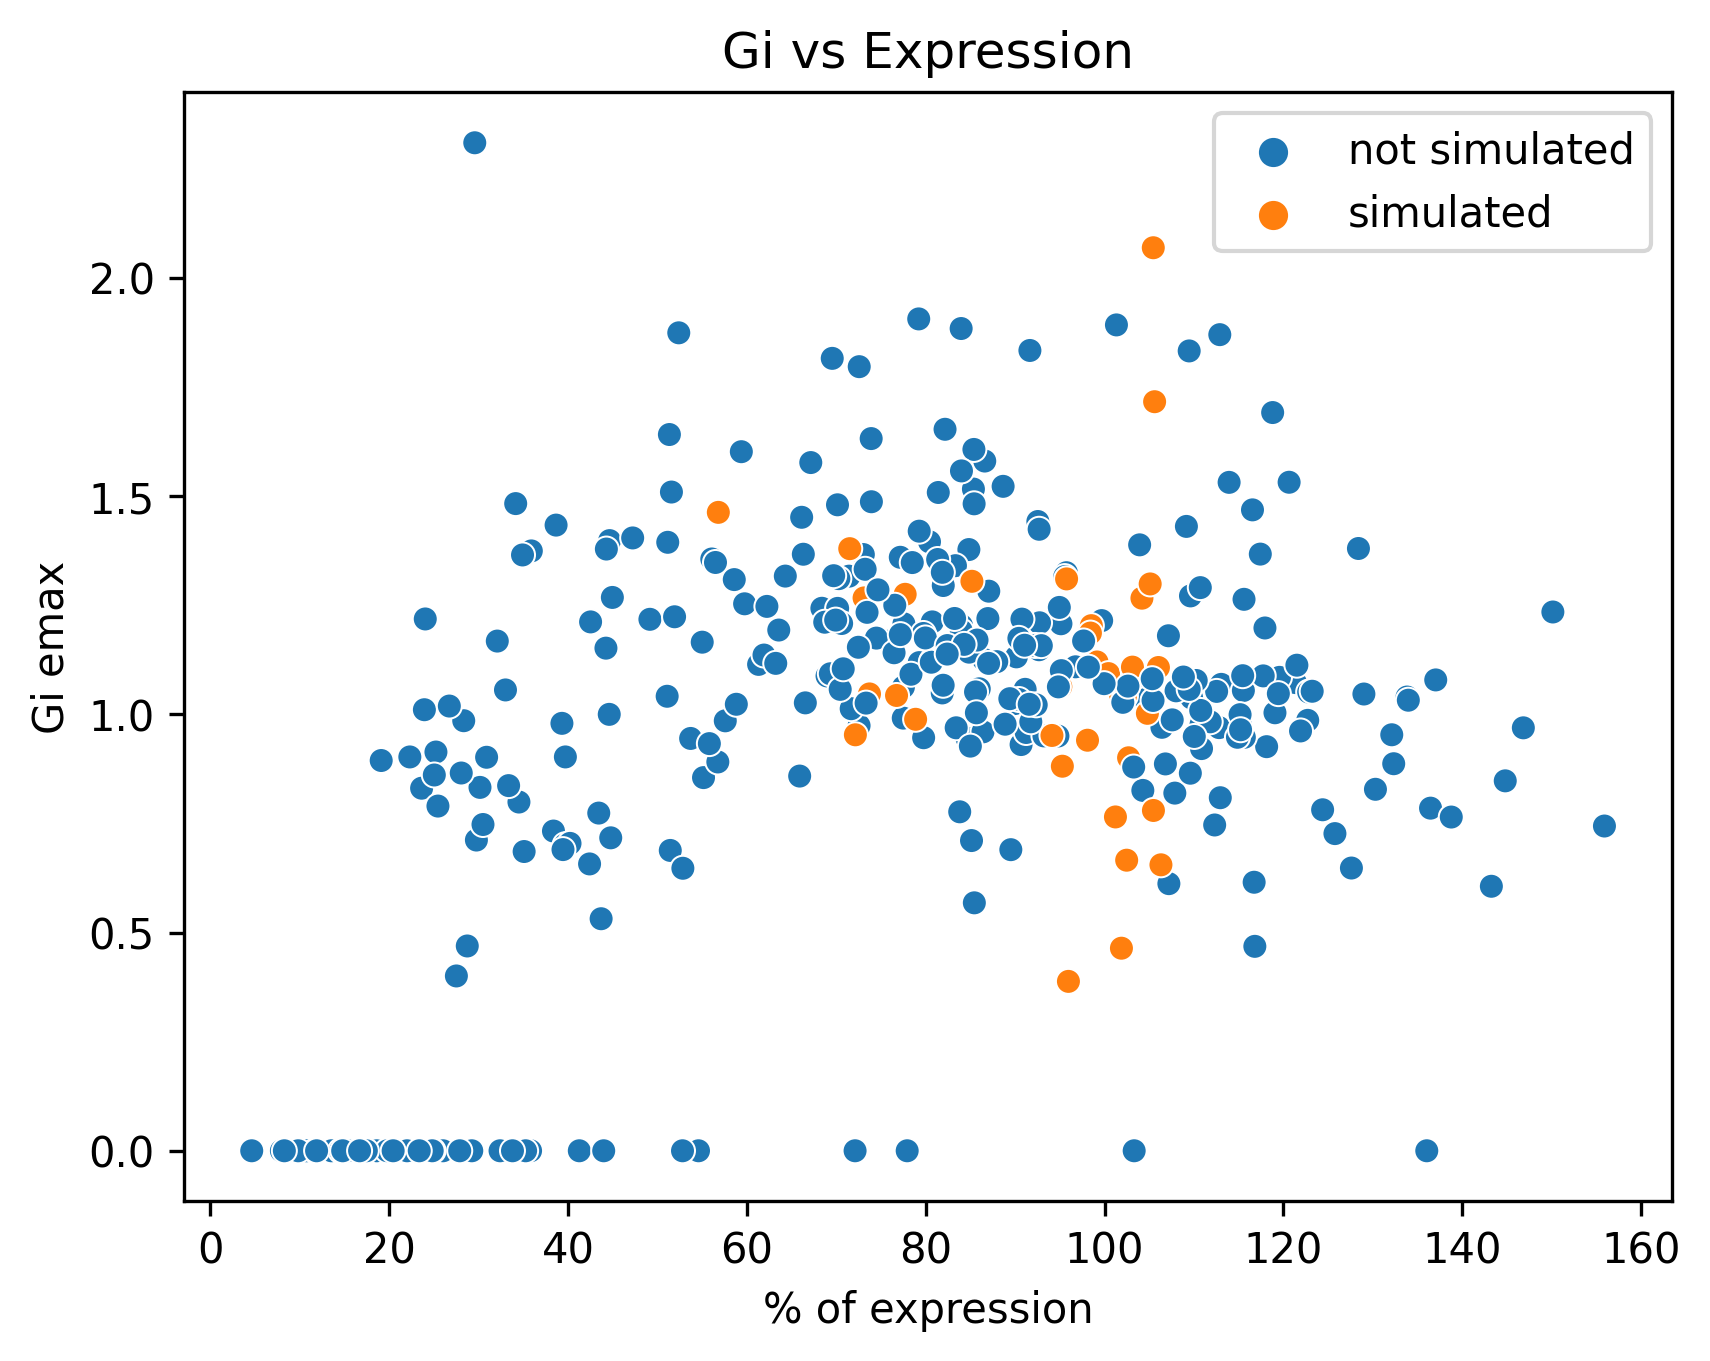

In [15]:
plt.figure(dpi=300)
g = sns.scatterplot(data=df, x='expression', y='gi', hue='simulated')
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles, labels=labels)
plt.xlabel('% of expression')
plt.ylabel('Gi emax')
plt.title('Gi vs Expression')
plt.show()

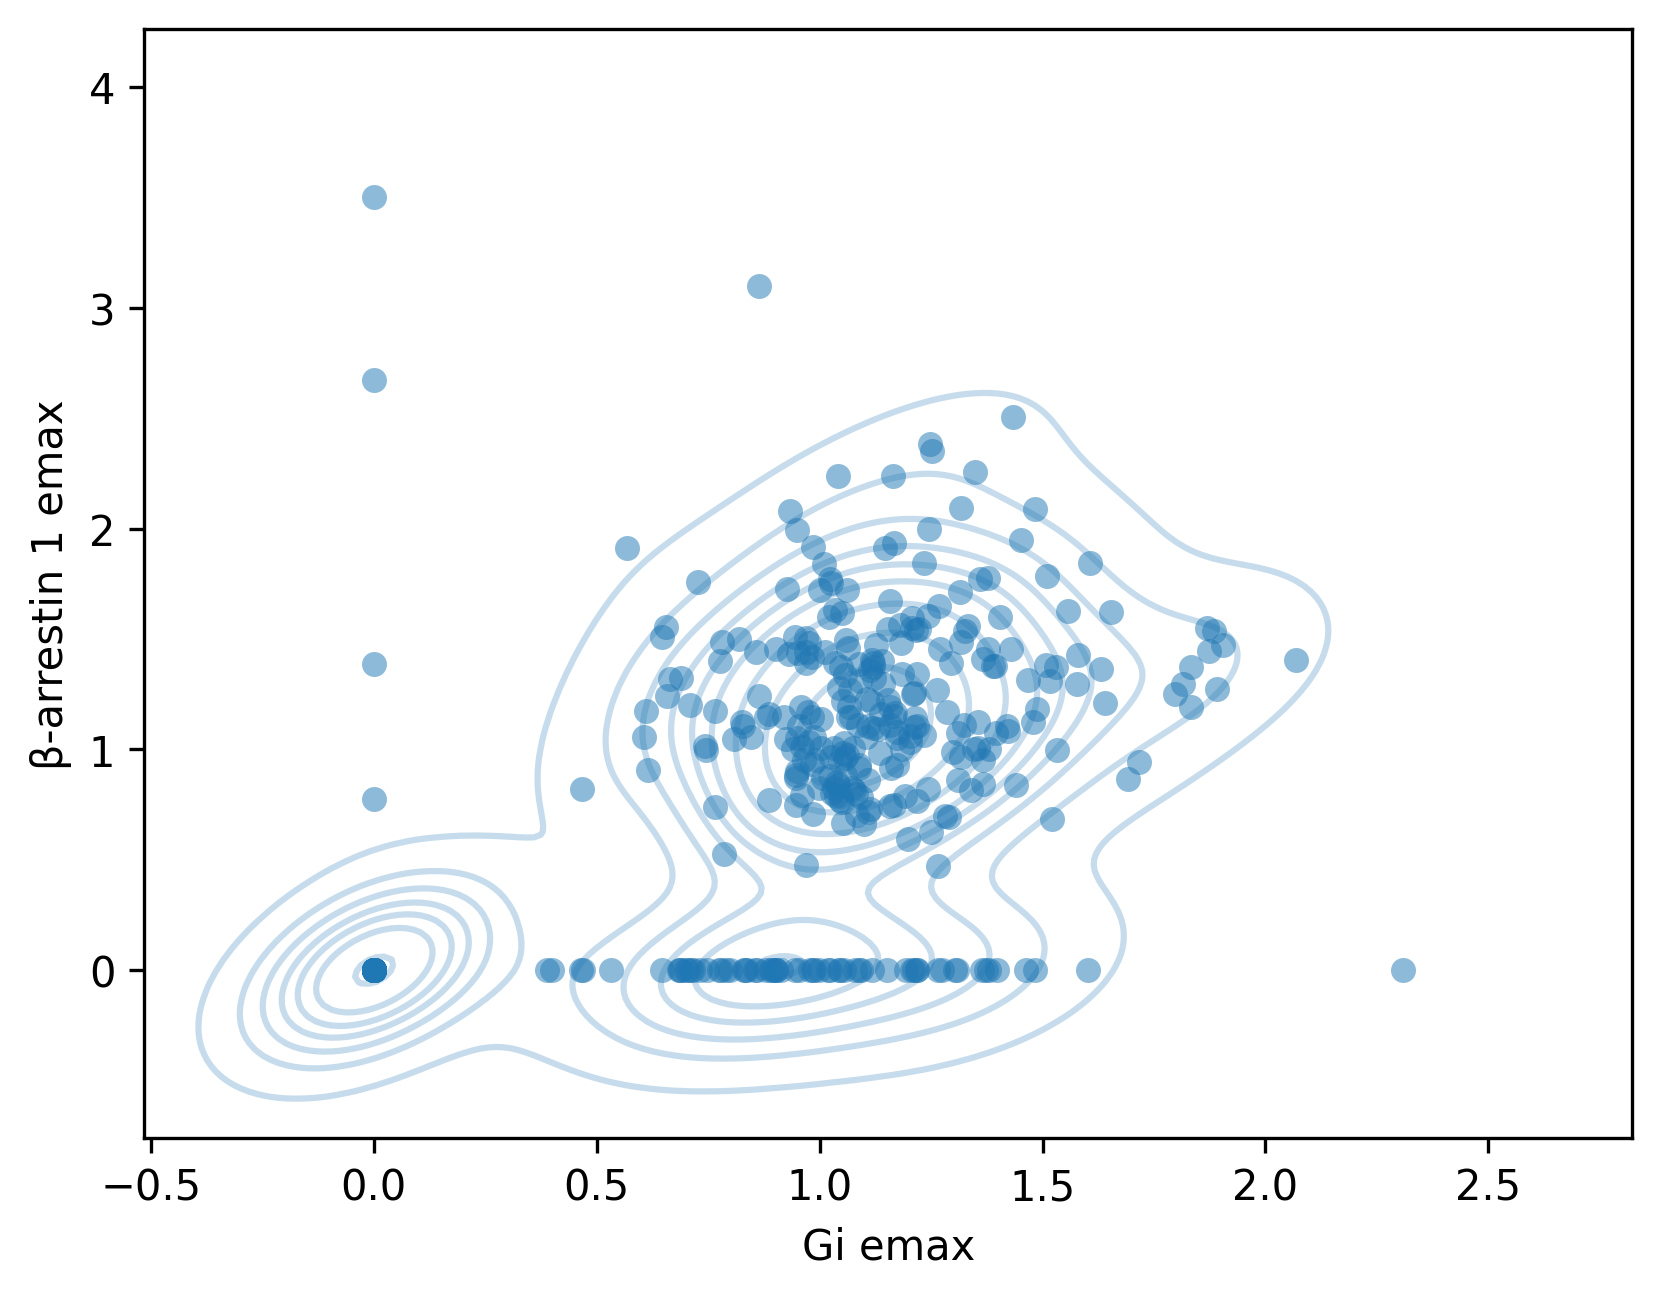

In [16]:
plt.figure(dpi=300)
sns.scatterplot(data=df, x='gi', y='barr1', alpha=0.5, linewidth=0)
sns.kdeplot(data=df, x='gi', y='barr1', alpha=0.25)
plt.xlabel('Gi emax')
plt.ylabel('β-arrestin 1 emax')
plt.show()

In [17]:
df

,mutant,expression,gi,barr1,simulated
0,1,104.277644,0.825515,1.122299,not simulated
1,2,116.723038,0.615114,0.907206,not simulated
2,3,121.328063,1.072523,0.826491,not simulated
3,4,84.004864,1.203155,1.060027,not simulated
4,5,119.051109,1.003370,1.008177,not simulated
...,...,...,...,...,...
367,356,94.837573,1.062682,0.976102,not simulated
368,357,97.655672,1.167825,0.747814,not simulated
369,358,98.189135,1.107844,0.862811,not simulated
370,359,91.057497,1.158079,0.744454,not simulated


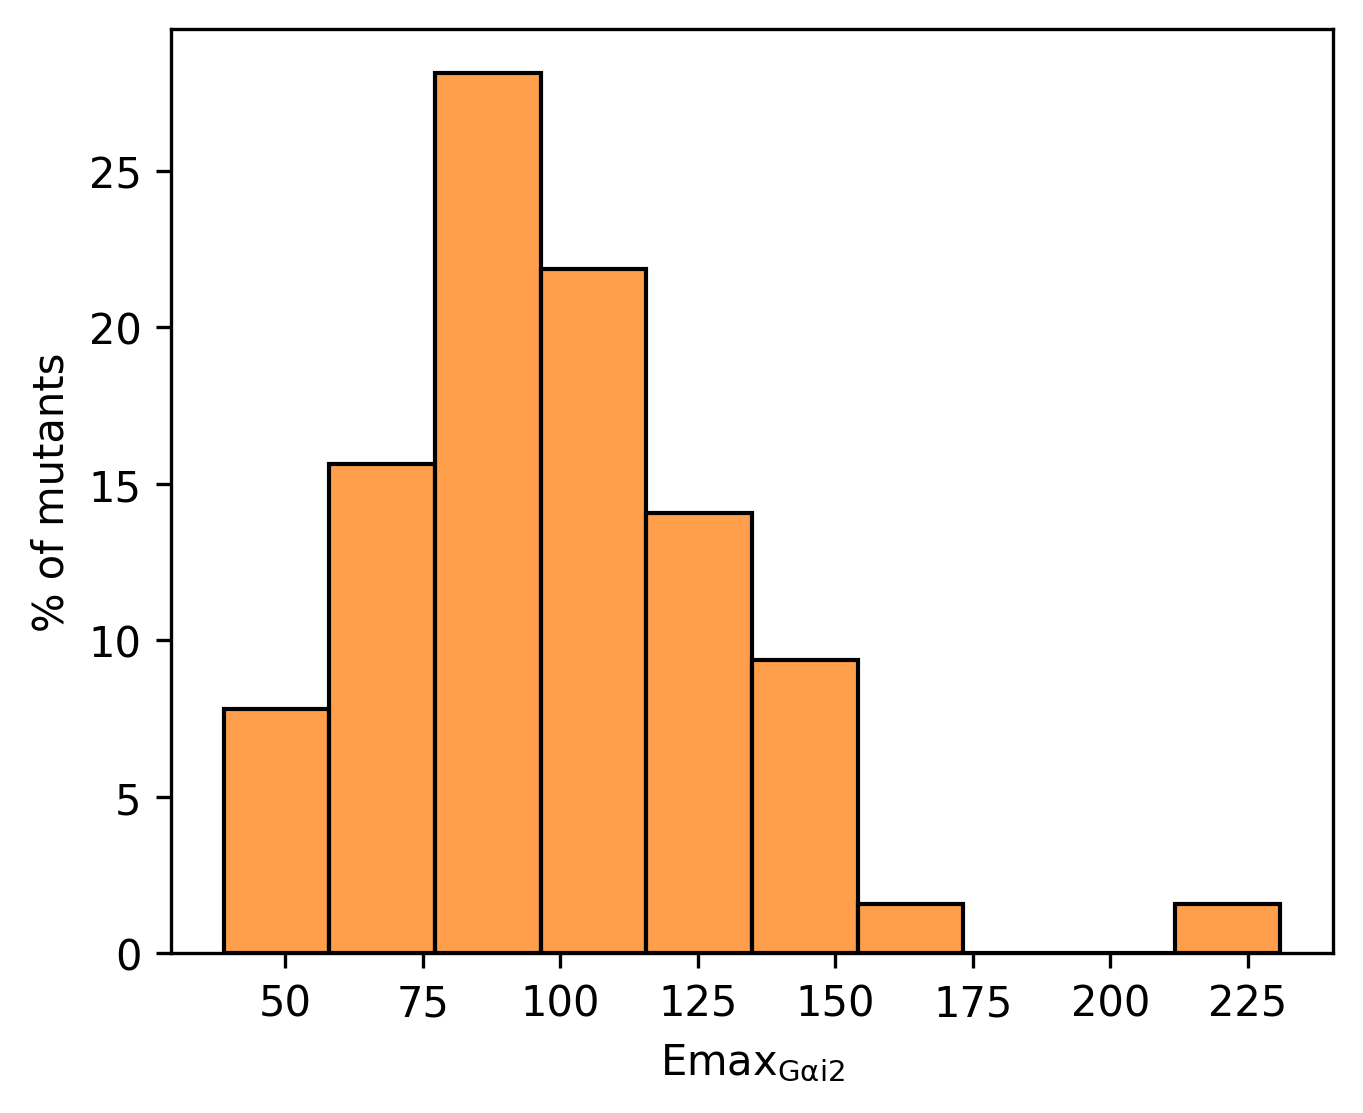

In [18]:
plt.figure(dpi=300, figsize=(5,4))

# create a mask for gi > 0
gi_mask = df.gi > 0
# create a mask for barr = 0
barr_mask = df.barr1 == 0

temp_df = df.copy()
# multiply gi by 100
temp_df.gi = temp_df.gi * 100

sns.histplot(data=temp_df[gi_mask & barr_mask], x='gi', stat='percent', color=sns.color_palette()[1])
plt.xlabel(r'$\mathrm{Emax_{G \alpha i2}}$')
plt.ylabel('% of mutants')
# plt.title('Distribution of Gi emax among Gi-preferred mutants')
plt.show()

In [19]:
df['profile'] = 'WT-like'
m1 = df.barr1 == 0
m2 = df.gi == 0

df['profile'][m1 & m2] = 'both loss'
df['profile'][m1 & ~m2] = 'barr loss'
df['profile'][~m1 & m2] = 'Gi loss'

/tmp/ipykernel_1837514/1346182242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profile'][m1 & m2] = 'both loss'
/tmp/ipykernel_1837514/1346182242.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profile'][m1 & ~m2] = 'barr loss'
/tmp/ipykernel_1837514/1346182242.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profile'][~m1 & m2] = 'Gi loss'


In [20]:
profile_df = pd.DataFrame(df.value_counts('profile', normalize=True)).reset_index()

In [21]:
profile_df.ratio = (profile_df.ratio * 100).round(2)

AttributeError: 'DataFrame' object has no attribute 'ratio'

In [22]:
profile_df.columns = ['profile', 'ratio']

In [23]:
profile_df

,profile,ratio
0,WT-like,0.696379
1,barr loss,0.178273
2,both loss,0.114206
3,Gi loss,0.011142


In [24]:
0.178273+0.114206+0.011142

0.303621

In [25]:
0.114206+0.011142

0.12534800000000001

In [26]:
profile_df

,profile,ratio
0,WT-like,0.696379
1,barr loss,0.178273
2,both loss,0.114206
3,Gi loss,0.011142


In [27]:
import numpy as np

In [28]:
palette = np.array(sns.color_palette())[[0,1,3,2]]

In [29]:
new_tick_lables = [r'$\mathrm{Coup_{G\alpha i2\_\beta arr1}}$', r'$\mathrm{PrefCoup_{G\alpha i2}}$',
                   r'$\mathrm{PrefCoup_{\beta arr1}}$',r'$\mathrm{NoCoup_{G\alpha i2\_\beta arr1}}$',]

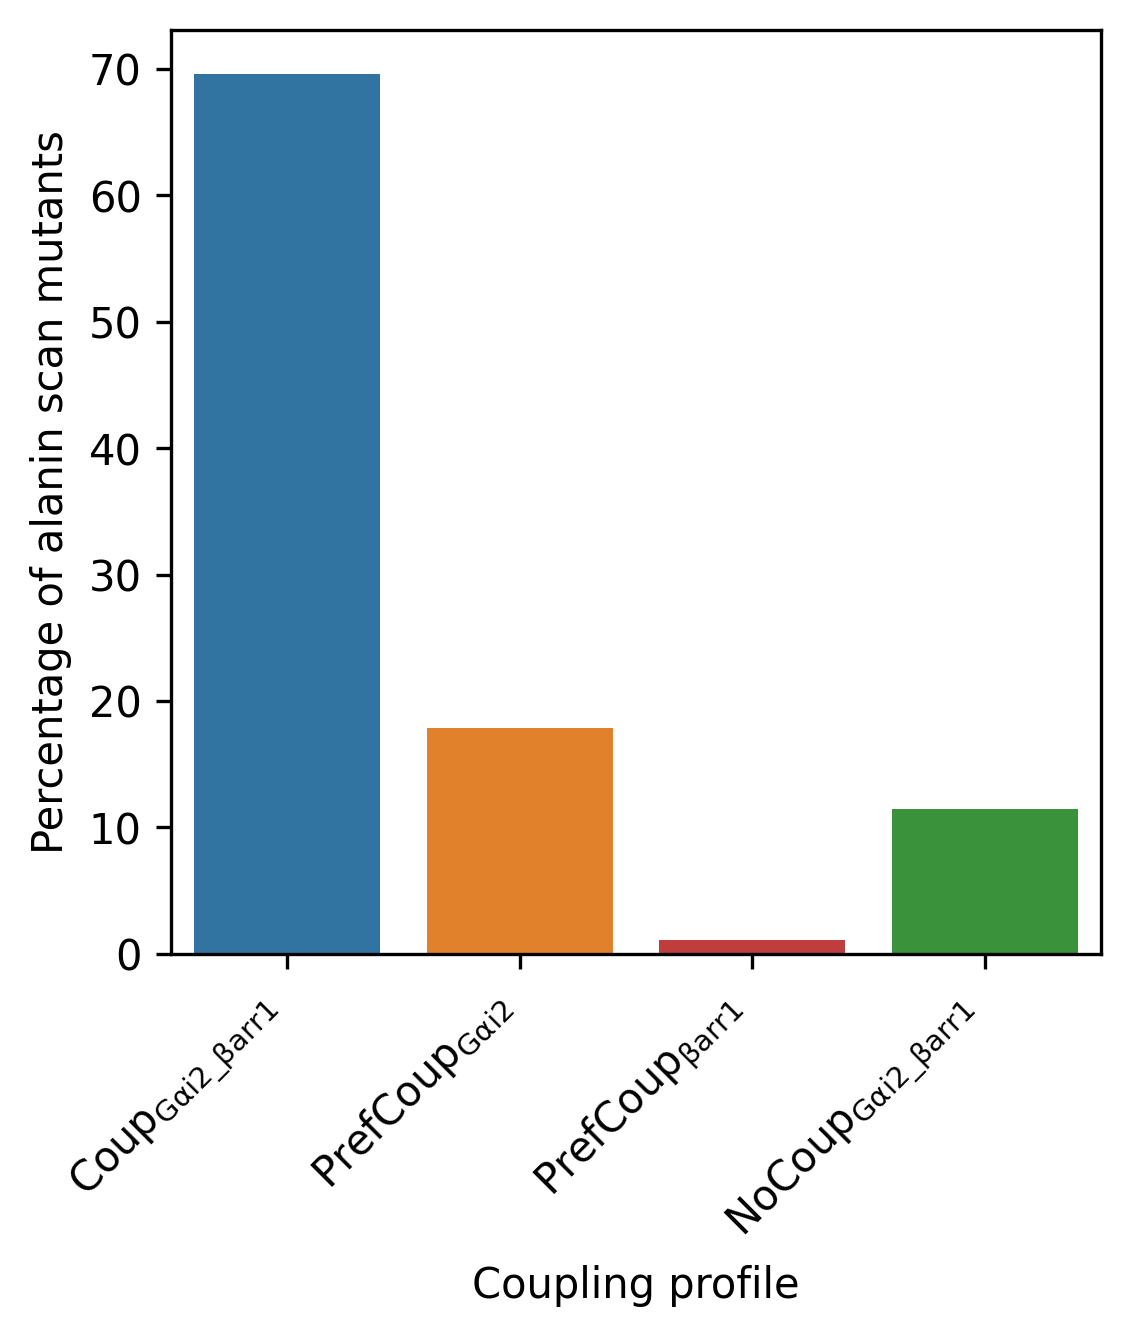

In [30]:
plt.figure(dpi=300, figsize=(4,4))

temp_profile_df = profile_df.copy()
temp_profile_df.ratio = temp_profile_df.ratio * 100

g = sns.barplot(data=temp_profile_df, x='profile', y='ratio', order=['WT-like', 'barr loss', 'Gi loss', 'both loss'], palette=palette)
plt.xlabel('Coupling profile')
plt.ylabel('Percentage of alanin scan mutants')
# plt.title('Proportion of coupling profiles')
plt.xticks(ticks=[0,1,2,3] ,labels=new_tick_lables, rotation=45, ha='right')

plt.show()

In [31]:

conserved_profile = pd.DataFrame([['both loss', 10],
['barr loss', 6],
['Gi loss', 1],
['WT-like', 5]], columns = ['set', 'ratio'])

In [32]:
conserved_profile.ratio = conserved_profile.ratio / conserved_profile.ratio.sum() * 100

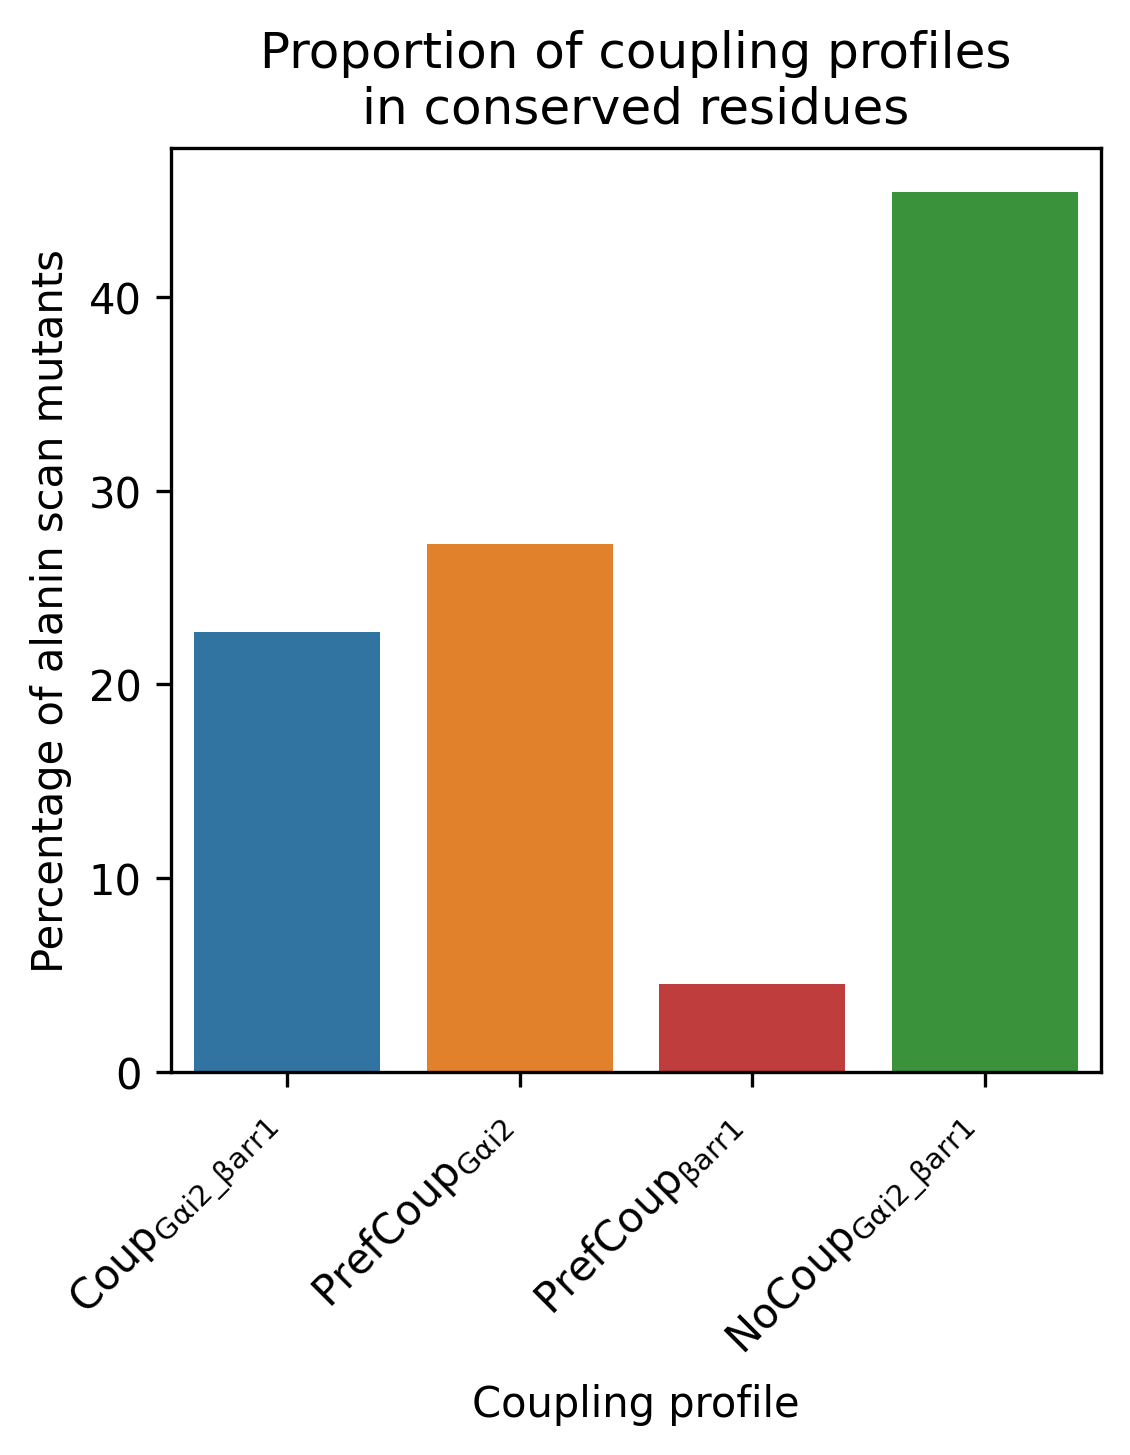

In [33]:
plt.figure(dpi=300, figsize=(4,4))
sns.barplot(data=conserved_profile, x='set', y='ratio', order=['WT-like', 'barr loss', 'Gi loss', 'both loss'], palette=palette)
plt.xlabel('Coupling profile')
plt.ylabel('Percentage of alanin scan mutants')
plt.title('Proportion of coupling profiles\nin conserved residues')
plt.xticks(ticks=[0,1,2,3] ,labels=new_tick_lables, rotation=45, ha='right')
plt.show()

In [ ]:
import itertools

In [ ]:
df

,mutant,expression,gi,barr1,simulated,profile
0,1,104.277644,0.825515,1.122299,not simulated,WT-like
1,2,116.723038,0.615114,0.907206,not simulated,WT-like
2,3,121.328063,1.072523,0.826491,not simulated,WT-like
3,4,84.004864,1.203155,1.060027,not simulated,WT-like
4,5,119.051109,1.003370,1.008177,not simulated,WT-like
...,...,...,...,...,...,...
367,356,94.837573,1.062682,0.976102,not simulated,WT-like
368,357,97.655672,1.167825,0.747814,not simulated,WT-like
369,358,98.189135,1.107844,0.862811,not simulated,WT-like
370,359,91.057497,1.158079,0.744454,not simulated,WT-like


In [ ]:
np.array(sns.color_palette())

array([[0.12156863, 0.46666667, 0.70588235],
       [1.        , 0.49803922, 0.05490196],
       [0.17254902, 0.62745098, 0.17254902],
       [0.83921569, 0.15294118, 0.15686275],
       [0.58039216, 0.40392157, 0.74117647],
       [0.54901961, 0.3372549 , 0.29411765],
       [0.89019608, 0.46666667, 0.76078431],
       [0.49803922, 0.49803922, 0.49803922],
       [0.7372549 , 0.74117647, 0.13333333],
       [0.09019608, 0.74509804, 0.81176471]])

In [ ]:
for comb in itertools.product(df.simulated.unique(), df.profile.unique()):
    sim, profile = comb
    print(sim, profile)
    print(' '.join(df[(df.simulated == sim) & (df.profile == profile)].mutant))

not simulated WT-like
1 2 3 4 5 6 7 8 9 10 12 13 14 15 16 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 44 45 46 56 57 59 60 62 63 66 67 69 74 78 81 85 87 88 89 90 92 94 95 96 97 99 100 102 103 104 105 106 108 110 114 116 122 124 127 129 134 136 137 138 139 140 141 142 143 144 145 147 148 150 151 153 155 156 160 161 162 163 166 167 169 170 172 175 177 181 187 188 189 192 193 196 200 201 206 207 208 210 211 212 214 215 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 242 244 247 248 252 253 254 255 256 259 261 263 265 266 267 270 271 272 273 275 276 277 280 283 284 286 287 288 289 290 294 300 301 303 304 308 309 311 312 315 316 318 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
not simulated barr loss
11 17 48 50 54 55 65 68 71 82 84 86 93 98 101 113 115 123 126 131 149 154 157 158 164 171 173 180 184 186 19

In [ ]:
df.simulated.unique()

array(['not simulated', 'simulated'], dtype=object)

In [ ]:
[255* a for a in sns.color_palette()[1]]

[255.0, 127.0, 14.0]

In [ ]:
for p in df.profile.unique():
    p_df = df[df.profile == p]
    print(p)
    print(p_df.mutant.values)

WT-like
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '12' '13' '14' '15' '16' '18'
 '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '31' '32'
 '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '44' '45' '46' '47'
 '49' '52' '53' '56' '57' '59' '60' '62' '63' '66' '67' '69' '74' '78'
 '81' '85' '87' '88' '89' '90' '91' '92' '94' '95' '96' '97' '99' '100'
 '102' '103' '104' '105' '106' '108' '110' '112' '114' '116' '119' '121'
 '122' '124' '127' '129' '134' '136' '137' '138' '139' '140' '141' '142'
 '143' '144' '145' '147' '148' '150' '151' '152' '153' '155' '156' '159'
 '160' '161' '162' '163' '165' '166' '167' '169' '170' '172' '175' '177'
 '178' '181' '185' '187' '188' '189' '192' '193' '196' '200' '201' '203'
 '206' '207' '208' '210' '211' '212' '214' '215' '218' '219' '220' '221'
 '222' '223' '224' '225' '226' '227' '228' '229' '230' '231' '232' '233'
 '234' '235' '236' '237' '238' '239' '240' '242' '244' '247' '248' '251'
 '252' '253' '254' '255' '256' '259' '261' '263' '2